# Pandas for Excel


资源整理来源自网易云课堂<a>https://study.163.com/course/introduction.htm?courseId=1006254007#/courseDetail?tab=1</a><br>
老师提供的是.py文件，我整理为jupyter notebook环境ipynb文件,方便在线阅读

## 相关文件整理以及业务excel需求实现
## 会同步
# 公众号【早晚充电】
## 及本文


## 第一课 创建文件


In [5]:


import pandas as pd

df = pd.DataFrame({'ID':[0,1,2],'Name':['Mark','Tomi','Jack']})

# 此处设置数据表的索引，如未设置索引会自动在最前方添加一列作为索引
df = df.set_index('ID') # 会生成新的 DataFrame
# df.set_index('ID',inplace=True) # 在原来的 DataFrame 上进行修改

# 将数据保存到 output.xlsx
df.to_excel('./output.xlsx')

print(df)
print('Done')

    Name
ID      
0   Mark
1   Tomi
2   Jack
Done


## 第二课 读取文件


In [10]:


import pandas as pd

# --基本数据的读取--

# 读取文件
# head：默认0，表示开始读取的行（默认会跳过顶部的空行）
# index_col: 指定数据的索引列
people = pd.read_excel('./People.xlsx',head=1,index_col='ID')
# 读取文件的行数和列数
shape = people.shape
# 读取文件的行,不会显示索引列
columns = people.columns
# 读取文件的前几行（默认为5，可传入指定行数）
head = people.head()
# 读取文件的末尾几行（默认为5，可传入指定行数）
tail = people.tail()

# --当数据文件存在坏数据时可按以下方式处理--
# （以下内容根据实际情况使用，同时使用会造成数据混乱）

# 当标题行上有坏数据时可使用 head 参数
people1 = pd.read_excel('./People.xlsx',head=1)

# 当数据表中没有标题行时可将 head 的值设为 None 表示无标题
people2 = pd.read_excel('./People.xlsx',head=None)
people2.columns = ['ID', 'Type', 'Title', 'FirstName', 'MiddleName', 'LastName']

print(columns)
people2.head(5)

Index(['Type', 'Title', 'FirstName', 'MiddleName', 'LastName'], dtype='object')


,ID,Type,Title,FirstName,MiddleName,LastName
0,1,Employee,NaN,Ken,J,Sánchez
1,2,Employee,NaN,Terri,Lee,Duffy
2,3,Employee,NaN,Roberto,NaN,Tamburello
3,4,Employee,NaN,Rob,NaN,Walters
4,5,Employee,Ms.,Gail,A,Erickson


## 第三课 行、列、单元格


In [11]:


import pandas as pd

# --创建Series--

# 方法一
d = {'X':100,'Y':200,'Z':300}
s1 = pd.Series(d) # 序列对象
s1.name
s1.index
print(s1.index)

# 方法二
L1 = [100,200,300]
L2 = ['X','Y','Z']
s2 = pd.Series(L1,index=L2)
print(s2.index)

# --操作Excel--

s1 = pd.Series([1,2,3],index=[1,2,3],name='A')
s2 = pd.Series([10,20,30],index=[1,2,3],name='B')
s3 = pd.Series([100,200,300],index=[1,2,3],name='C')

df = pd.DataFrame({s1.name:s1,s2.name:s2,s3.name:s3})
print(df)

Index(['X', 'Y', 'Z'], dtype='object')
Index(['X', 'Y', 'Z'], dtype='object')
   A   B    C
1  1  10  100
2  2  20  200
3  3  30  300


## 第四课 数据区域的读取，填充整数、文字

In [42]:


import pandas as pd
from datetime import date,timedelta

# --数据区域的读取--

# skiprows: 从序号为3的行开始读取(类似于 header)
# usecols： 读取列的范围
# dtype: 设置每一列的数据类型
books = pd.read_excel('./Books.xlsx',usecols=[2,3,4,5,6],skiprows=3,dtype={'ID':str,'Name':str,'InStore':str,'Date':str})
print(books)


print('-----------------分隔符-----------------')




     ID      Name InStore Date
0   nan  Book_001     nan  nan
1   nan  Book_002     nan  nan
2   nan  Book_003     nan  nan
3   nan  Book_004     nan  nan
4   nan  Book_005     nan  nan
5   nan  Book_006     nan  nan
6   nan  Book_007     nan  nan
7   nan  Book_008     nan  nan
8   nan  Book_009     nan  nan
9   nan  Book_010     nan  nan
10  nan  Book_011     nan  nan
11  nan  Book_012     nan  nan
12  nan  Book_013     nan  nan
13  nan  Book_014     nan  nan
14  nan  Book_015     nan  nan
15  nan  Book_016     nan  nan
16  nan  Book_017     nan  nan
17  nan  Book_018     nan  nan
18  nan  Book_019     nan  nan
19  nan  Book_020     nan  nan
-----------------分隔符-----------------


## 第五课 填充日期序列


In [44]:
# --填充整数、文字、日前--

# 日期加月份
# d：起始日期，type：date
# month_delta： 要添加的月数，type：int
# 返回添加后的结果，type：date
def add_month(d, month_delta):
    year_delta = month_delta // 12
    month = d.month + month_delta % 12
    if month != 12:
        year_delta += month // 12
        month = month % 12
    return date(d.year + year_delta, month, d.day)

start = date(2018,10,17)

for i in books.index:
    books.at[i,'ID'] = i + 1
    books.at[i,'InStore'] = 'Yes' if i % 2 == 0 else 'No'
    books.at[i,'Date'] = add_month(start,i)
print(books)

books.set_index('ID')
books.to_excel('./Books_output.xlsx')
print('-----------------Done-----------------')

    ID      Name InStore        Date
0    1  Book_001     Yes  2018-10-17
1    2  Book_002      No  2018-11-17
2    3  Book_003     Yes  2018-12-17
3    4  Book_004      No  2019-01-17
4    5  Book_005     Yes  2019-02-17
5    6  Book_006      No  2019-03-17
6    7  Book_007     Yes  2019-04-17
7    8  Book_008      No  2019-05-17
8    9  Book_009     Yes  2019-06-17
9   10  Book_010      No  2019-07-17
10  11  Book_011     Yes  2019-08-17
11  12  Book_012      No  2019-09-17
12  13  Book_013     Yes  2019-10-17
13  14  Book_014      No  2019-11-17
14  15  Book_015     Yes  2019-12-17
15  16  Book_016      No  2020-01-17
16  17  Book_017     Yes  2020-02-17
17  18  Book_018      No  2020-03-17
18  19  Book_019     Yes  2020-04-17
19  20  Book_020      No  2020-05-17
-----------------Done-----------------


## 第六课 函数填充


In [46]:


import pandas as pd

books = pd.read_excel('./Booksinput.xlsx',index_col='ID')
print('----计算前----')
print(books.head(5))

# 方法一

# books['Price'] = books['ListPrice'] * books['Discount']
# print('----方法一----')
# print(books)

# 方法二（此方法可以对计算的行的范围进行精确控制）

for i in range(5,16): # books.index:
    books['Price'].at[i] = books['ListPrice'].at[i] * books['Discount'].at[i]
    
print('----方法二----')
print(books)

# 方法一
books['ListPrice'] += 2

# 方法二
def add_2(x):
    return x + 2
books['ListPrice'] = books['ListPrice'].apply(add_2)

# 方法三
books['ListPrice'] = books['ListPrice'].apply(lambda x:x+2)
print(books)

----计算前----
        Name  ListPrice  Discount  Price
ID                                      
1   Book_001         10       0.5    NaN
2   Book_002         20       0.5    NaN
3   Book_003         30       0.5    NaN
4   Book_004         40       0.5    NaN
5   Book_005         50       0.5    NaN
----方法二----
        Name  ListPrice  Discount  Price
ID                                      
1   Book_001         10       0.5    NaN
2   Book_002         20       0.5    NaN
3   Book_003         30       0.5    NaN
4   Book_004         40       0.5    NaN
5   Book_005         50       0.5   25.0
6   Book_006         60       0.5   30.0
7   Book_007         70       0.5   35.0
8   Book_008         80       0.5   40.0
9   Book_009         90       0.5   45.0
10  Book_010        100       0.5   50.0
11  Book_011        110       0.5   55.0
12  Book_012        120       0.5   60.0
13  Book_013        130       0.5   65.0
14  Book_014        140       0.5   70.0
15  Book_015        150       0.5

## 第七课 排序，多重排序


In [48]:


import pandas as pd

products = pd.read_excel('./List.xlsx',index_col='ID')

print('----原始数据----')
print(products.head(5))

# sort_values 排序方法
# by：根据什么排序
# inplace：在原数据集中排序，而不是生成新的数据集
# ascending：排序的顺序（True：默认，顺序|False：倒序）

# 以 Price 按 倒序 排序
products.sort_values(by='Price',inplace=True,ascending=False)
print('\n----以 Price 按 倒序 排序----')
print(products.head(5))

# 先以 Worthy 按 顺序 排序，再以 Price 按倒序排序
products.sort_values(by=['Worthy','Price'],inplace=True,ascending=[True,False])
print('\n----先以 Worthy 按 顺序 排序，再以 Price 按倒序排序----')
print(products.head(5))

----原始数据----
           Name  Price Worthy
ID                           
1   Product_001   9.82    Yes
2   Product_002  11.99    Yes
3   Product_003   9.62     No
4   Product_004  11.08    Yes
5   Product_005   7.75    Yes

----以 Price 按 倒序 排序----
           Name  Price Worthy
ID                           
2   Product_002  11.99    Yes
17  Product_017  11.95    Yes
18  Product_018  11.22     No
8   Product_008  11.14    Yes
4   Product_004  11.08    Yes

----先以 Worthy 按 顺序 排序，再以 Price 按倒序排序----
           Name  Price Worthy
ID                           
18  Product_018  11.22     No
15  Product_015  10.31     No
3   Product_003   9.62     No
9   Product_009   8.98     No
6   Product_006   7.34     No


## 第八课 数据筛选、过滤


In [49]:


import pandas as pd

Students = pd.read_excel('./Students.xlsx',index_col='ID')

print('----原始数据----')
print(Students)

# Age 大于等于 18 小于 30
def age_18_to_30(age):
    return 18 <= age < 30

# 成绩在 85 到 100 之间
def level_a(score):
    return 85 <= score <= 100

# 筛选 Age 大于等于 18 小于 30 的学生
Students = Students.loc[Students['Age'].apply(lambda age:18 <= age < 30)]
print('\n----筛选 Age 大于等于 18 小于 30 的学生----')
print(Students)

# 筛选 Age 大于等于 18 小于 30 成绩在 85 到 100 之间 的学生
Students = Students.loc[Students.Age.apply(age_18_to_30)] \
    .loc[Students.Score.apply(level_a)]
print('\n----筛选 Age 大于等于 18 小于 30 成绩在 85 到 100 之间 的学生----')
print(Students)

# 补充知识点
# 1. Students['Age'] 的写法可以简写为 Students.Age
# 2. age_18_to_30 函数可以用 lambda 表达式代替，因此
#    .apply(age_18_to_30) 可以简写为 .apply(lambda age:18 <= age < 30)
# 3. Python 中 如遇表达式过长可以使用 ' \'(空格加正斜杠加回车)的方式换行


----原始数据----
           Name  Age  Score
ID                         
1   Student_001   16     87
2   Student_002   26     92
3   Student_003   33    100
4   Student_004   27     73
5   Student_005   32     63
6   Student_006   20     93
7   Student_007   19     55
8   Student_008   21     61
9   Student_009   18     85
10  Student_010   35     69
11  Student_011   22     50
12  Student_012   17     54
13  Student_013   31     59
14  Student_014   17     60
15  Student_015   34     59
16  Student_016   30     96
17  Student_017   16     77
18  Student_018   35     87
19  Student_019   19     86
20  Student_020   20     94

----筛选 Age 大于等于 18 小于 30 的学生----
           Name  Age  Score
ID                         
2   Student_002   26     92
4   Student_004   27     73
6   Student_006   20     93
7   Student_007   19     55
8   Student_008   21     61
9   Student_009   18     85
11  Student_011   22     50
19  Student_019   19     86
20  Student_020   20     94

----筛选 Age 大于等于 18 小于 30 成绩在

## 第九课 柱状图


----原始数据----
                                Field  Number
0                         Agriculture   12318
1             Business and Management  200312
2                           Education   19483
3                         Engineering  216932
4               Fine and Applied Arts   59736
5                  Health Professions   33947
6                          Humanities   17664
7   Mathematics and Computer Sciences  141651
8     Other/Unspecified Subject Areas  185107
9          Physical and Life Sciences   75385
10                    Social Sciences   81304


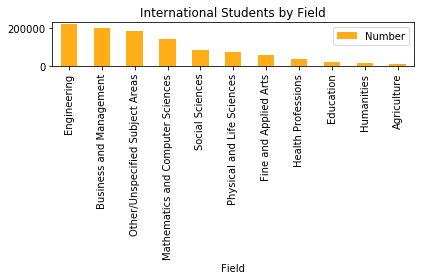

In [78]:


import pandas as pd
import matplotlib.pyplot as plt

students = pd.read_excel('./Students_pic.xlsx')

print('----原始数据----')
print(students)

students.sort_values(by='Number',inplace=True,ascending=False)
# 使用 pandas 绘图（需要使用 matplotlib 展示图表）
students.plot.bar(x="Field",y='Number',alpha=0.9, width = 0.5,color='orange',title='International Students by Field')

# plt.bar(students.Field,students.Number,color='orange')
# plt.xticks(students.Field,rotation='90') # 将 Field 旋转 90 度
# plt.xlabel('Field') # 设置 x轴 标题
# plt.ylabel('Number') # 设置 y轴 标题
# plt.title('International Students by Field',fontsize=16) # 设置标题

# 展示图表
plt.tight_layout() # 紧凑型布局
plt.show()

## 第十课 绘制分组柱图（纵），深度优化图表


----原始数据----
                                Field    2016    2017
0                         Agriculture   12318   12602
1             Business and Management  200312  200754
2       Communications and Journalism   21160   21913
3                           Education   19483   17993
4                         Engineering  216932  230711
5               Fine and Applied Arts   59736   61506
6                          Humanities   17664   17561
7                   Intensive English   40877   30309
8   Legal Studies and Law Enforcement   15077   15306
9           Math and Computer Science  141651  167180
10         Physical and Life Sciences   75385   76838
11                    Social Sciences   81304   83046
12              Other Fields of Study   81318   87577
13                         Undeclared   26675   21131


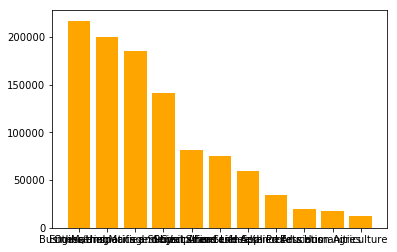

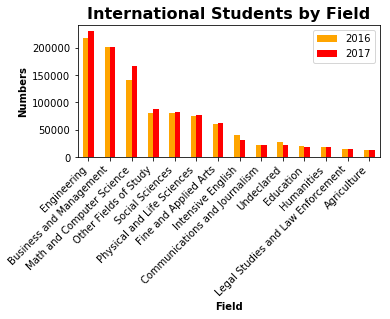

In [71]:


import pandas as pd
import matplotlib.pyplot as plt

students = pd.read_excel('./Students_group.xlsx')

print('----原始数据----')
print(students)

students.sort_values(by='2017',inplace=True,ascending=False)
students.plot.bar(x='Field',y=['2016','2017'],color=['orange','red'])

plt.title('International Students by Field',fontsize=16,fontweight='bold')
plt.xlabel('Field',fontweight='bold')
plt.ylabel('Numbers',fontweight='bold')
ax = plt.gca() # 获取图表的轴
ax.set_xticklabels(students['Field'],rotation=45,ha='right')
f = plt.gcf() # 获取图表的图形
f.subplots_adjust(left=0.2,bottom=0.42)
# plt.tight_layout()
plt.show()


## 第十一课 绘制分组柱图(横)，深度优化图表


        Name  Oct  Nov  Dec  Total
ID                                
12  User_012    7   11   11     29
14  User_014    9   11   11     31
1   User_001    7   15   10     32
2   User_002   10   13   10     33
6   User_006   11    9   14     34
10  User_010    9   15   10     34
4   User_004    8   14   13     35
18  User_018    8   13   14     35
5   User_005    8   11   16     35
20  User_020    9   13   13     35
8   User_008    9   12   16     37
9   User_009   11   11   15     37
11  User_011    9   14   15     38
19  User_019    8   16   15     39
3   User_003   12   10   17     39
17  User_017   10   13   16     39
13  User_013    7   15   18     40
7   User_007   11   14   17     42
15  User_015   10   15   18     43
16  User_016   12   14   17     43


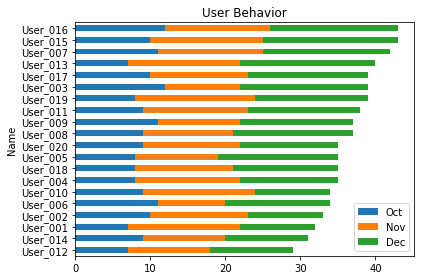

In [79]:


import pandas as pd
import matplotlib.pyplot as plt

users = pd.read_excel('./Users.xlsx',index_col='ID')
users['Total'] = users['Oct'] + users['Nov'] + users['Dec']
users.sort_values(by='Total',inplace=True,ascending=True)
print(users)

# stacked: 叠加（默认为False）
users.plot.barh(x='Name',y=['Oct','Nov','Dec'],stacked=True,title='User Behavior')

plt.tight_layout()
plt.show()

# 补充说明
# users.plot.bar(...) 表示制作竖直柱状图
# users.plot.barh(...) 表示制作水平柱状图
# 
# 
# 


## 第十二课 绘制饼图



----原始数据----
                Rank    2016    2017
From                                
China              1  328547  350755
India              2  165918  186267
South Korea        3   61007   58663
Saudi Arabia       4   61287   52611
Canada             5   26973   27065
Vietnam            6   21403   22438
Taiwan             7   21127   21516
Japan              8   19060   18780
Mexico             9   16733   16835
Brazil            10   19370   13089
Iran              11   12269   12643
Nigeria           12   10674   11710
Nepal             13    9662   11607
United Kingdom    14   11599   11489
Turkey            15   10691   10586
Germany           16   10145   10169
Kuwait            17    9772    9825
France            18    8764    8814
Indonesia         19    8727    8776
Venezuela         20    8267    8540
Malaysia          21    7834    8247
Colombia          22    7815    7982
Hong Kong         23    7923    7547
Spain             24    6640    7164
Bangladesh        25    6

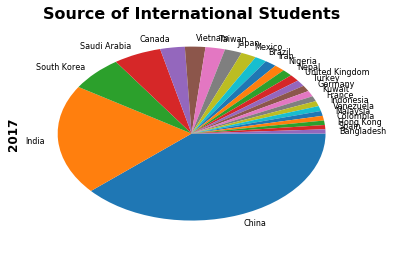

In [80]:

import pandas as pd 
import matplotlib.pyplot as plt

students = pd.read_excel('./Students_pie.xlsx',index_col="From")
print('----原始数据----')
print(students)

# counterclock: True(默认值): 逆时针，False: 顺时针
students['2017'].plot.pie(fontsize=8,counterclock=False)
plt.title('Source of International Students',fontsize=16,fontweight='bold')
plt.ylabel('2017',fontsize=12,fontweight='bold')
plt.show()


## 第十三课 绘制折线趋势图、叠加区域图



----原始数据----
       Accessories         Bikes       Clothing    Components   Grand Total
Week                                                                       
1      9939.465500  2.258337e+06    9641.476058  7.872110e+04  2.356639e+06
2     12626.660000  6.005350e+05    7261.730000  0.000000e+00  6.204234e+05
3     14414.950000  5.547708e+05    6775.780000  0.000000e+00  5.759616e+05
4     12924.580000  5.892557e+05    6191.370000  0.000000e+00  6.083717e+05
5     40443.498516  5.749222e+06   99474.598226  4.709014e+05  6.360041e+06
6     13735.460000  5.539423e+05    7660.730000  0.000000e+00  5.753385e+05
7     13588.800000  6.053847e+05    5786.010000  0.000000e+00  6.247596e+05
8     13997.810000  5.320056e+05    6690.370000  0.000000e+00  5.526938e+05
9     52392.263204  4.701389e+06  128208.010272  6.852023e+05  5.567191e+06
10    14276.640000  5.815496e+05    7921.090000  0.000000e+00  6.037474e+05
11    13584.320000  6.169319e+05    6685.880000  0.000000e+00  6.372021e+05

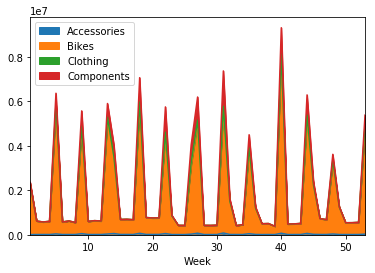

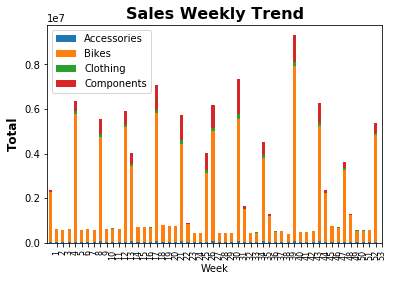

In [82]:

import pandas as pd 
import matplotlib.pyplot as plt

weeks = pd.read_excel('./Orders.xlsx',index_col='Week')
print('----原始数据----')
print(weeks)

# 叠加区域图
weeks.plot.area(y=['Accessories','Bikes','Clothing','Components'])
# 叠加柱状图
weeks.plot.bar(y=['Accessories','Bikes','Clothing','Components'],stacked=True)
plt.title('Sales Weekly Trend',fontsize=16,fontweight='bold')
plt.ylabel('Total',fontsize=12,fontweight='bold')
plt.xticks(weeks.index,fontsize=8)
plt.show()

# 补充说明
# weeks.plot(...) 绘制折线图
# weeks.plot.area(...) 绘制叠加区域图
# weeks.plot.bar(...) 绘制叠加柱状腿
# 


## 第十四课 散点图，直方图，密度图
## 第十五课 密度图，数据相关性



----原始数据----
             price  bedrooms  bathrooms  sqft_living  sqft_basement  sqft_lot  \
id                                                                              
7129300520  221900         3       1.00         1180              0      5650   
6414100192  538000         3       2.25         2570            400      7242   
5631500400  180000         2       1.00          770              0     10000   
2487200875  604000         4       3.00         1960            910      5000   
1954400510  510000         3       2.00         1680              0      8080   

            floors  yr_built  
id                            
7129300520     1.0      1955  
6414100192     2.0      1951  
5631500400     1.0      1933  
2487200875     1.0      1965  
1954400510     1.0      1987  
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement',
       'sqft_lot', 'floors', 'yr_built'],
      dtype='object')


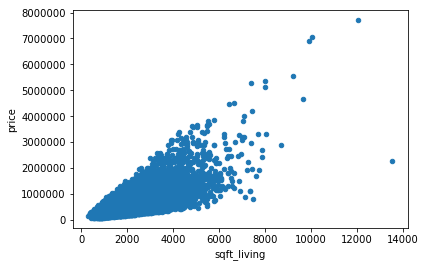

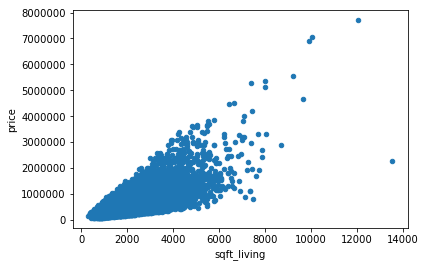

In [86]:


import pandas as pd 
import matplotlib.pyplot as plt

pd.options.display.max_columns = 20
homes = pd.read_excel('./home_data.xlsx',index_col='id')
print('----原始数据----')
print(homes.head())
print(homes.columns)

# 散点图
homes.plot.scatter(x='sqft_living',y='price')
plt.show()

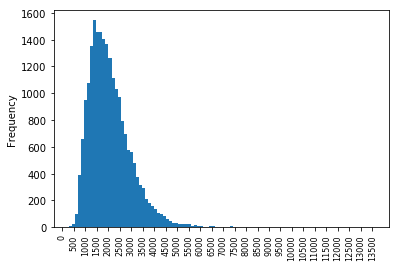

In [88]:
# 直方图 bins: 分配粒度
homes.sqft_living.plot.hist(bins=100)
plt.xticks(range(0,max(homes.sqft_living),500),fontsize=8,rotation=90)
plt.show()


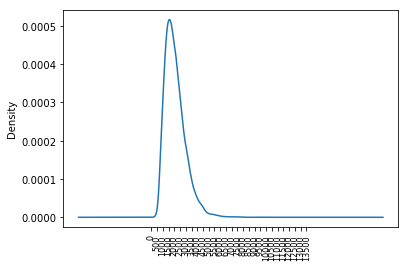

In [89]:
# 密度图
homes.sqft_living.plot.kde()
plt.xticks(range(0,max(homes.sqft_living),500),fontsize=8,rotation=90)
plt.show()


## 第十六课 多表联合（Join）


In [18]:
import pandas as pd 

students = pd.read_excel('./Student_Score.xlsx',sheet_name='Students',)
scores = pd.read_excel('./Student_Score.xlsx',sheet_name='Scores',)
print('----原始数据----')
print('\n----Students----')
print(students)
print(students.columns)
print('\n----Scores----')
print(scores)
print(scores.columns)

----原始数据----

----Students----
    ID         Name  score
0    1  Student_001   81.0
1    3  Student_003   83.0
2    5  Student_005   85.0
3    7  Student_007   87.0
4    9  Student_009   89.0
5   11  Student_011   91.0
6   13  Student_013   95.0
7   15  Student_015   97.0
8   17  Student_017   99.0
9   19  Student_019    NaN
10  21  Student_021    NaN
11  23  Student_023    NaN
12  25  Student_025    NaN
13  27  Student_027    NaN
14  29  Student_029    NaN
15  31  Student_031    NaN
16  33  Student_033    NaN
17  35  Student_035    NaN
18  37  Student_037    NaN
19  39  Student_039    NaN
Index(['ID', 'Name', 'score'], dtype='object')

----Scores----
    ID         Name  score
0    1  Student_001   81.0
1    3  Student_003   83.0
2    5  Student_005   85.0
3    7  Student_007   87.0
4    9  Student_009   89.0
5   11  Student_011   91.0
6   13  Student_013   95.0
7   15  Student_015   97.0
8   17  Student_017   99.0
9   19  Student_019    NaN
10  21  Student_021    NaN
11  23  Student

In [27]:
# 联合查询

# 方法一
# how: 链接方式
#   inner(默认)-inner join
#   left-左链接
#   right-右链接
# on: 链接字段(如果省略此属性，merge会自动以相同的列名作为链接的依据，但不会比较 index_col)
# left_on/right_on: 分别指定两张表的链接依据
# fillna(0): 将'NaN'替换为0

# table1 = students.merge(scores,how='left',left_on='ID',right_on='ID').fillna(0)
# table1.score = table1.score.astype(int) # 将Score中的小数转换为整数
# print('\n----联合查询 方法一(inner join)----')
# print(table1)

# 方法二
# how: 链接方式
#   inner(默认)-inner join
#   left-左链接
#   right-右链接
# on: 链接字段(设置了 index_col 时如果省略此属性，join会自动以 index_col 作为链接的依据)
# fillna(0): 将'NaN'替换为0
table2 = students.join(scores,how='left',on=None,lsuffix='_l', rsuffix='_r').fillna(0)
# table2.score = table2.score.astype(int) # 将Score中的小数转换为整数
print('\n----联合查询 方法二(inner join)----')
print(table2)


----联合查询 方法二(inner join)----
    ID_l       Name_l  score_l  ID_r       Name_r  score_r
0      1  Student_001     81.0     1  Student_001     81.0
1      3  Student_003     83.0     3  Student_003     83.0
2      5  Student_005     85.0     5  Student_005     85.0
3      7  Student_007     87.0     7  Student_007     87.0
4      9  Student_009     89.0     9  Student_009     89.0
5     11  Student_011     91.0    11  Student_011     91.0
6     13  Student_013     95.0    13  Student_013     95.0
7     15  Student_015     97.0    15  Student_015     97.0
8     17  Student_017     99.0    17  Student_017     99.0
9     19  Student_019      0.0    19  Student_019      0.0
10    21  Student_021      0.0    21  Student_021      0.0
11    23  Student_023      0.0    23  Student_023      0.0
12    25  Student_025      0.0    25  Student_025      0.0
13    27  Student_027      0.0    27  Student_027      0.0
14    29  Student_029      0.0    29  Student_029      0.0
15    31  Student_031     

## 第十七课 数据校验，轴的概念


In [14]:


import pandas as pd 

# 方法一
def score_validation(row):
    try:
        assert 0 <= row.Score <= 100
    except:
        print(f'#{row.ID}\tstudent {row.Name} has an invalid score {row.Score}.')

# 方法二
def score_validation2(row):
    if not 0 <= row.Score <= 100:
        print(f'#{row.ID}\tstudent {row.Name} has an invalid score {row.Score}.')

# 在进行数据校验时不要设置 index_col ，这样有助于保证所有数据都进行校验
students = pd.read_excel('./Students_jiaoyan.xlsx')
print('----原始数据----')
print(students)
print(students.columns)

print('\n----校验结果----')
students.apply(score_validation2,axis=1)

# axis = 1: 横向
# axis = 0: 纵向（默认）

----原始数据----
    ID         Name  Score
0    1  Student_001    -40
1    2  Student_002    -30
2    3  Student_003    -20
3    4  Student_004    -10
4    5  Student_005      0
5    6  Student_006     10
6    7  Student_007     20
7    8  Student_008     30
8    9  Student_009     40
9   10  Student_010     50
10  11  Student_011     60
11  12  Student_012     70
12  13  Student_013     80
13  14  Student_014     90
14  15  Student_015    100
15  16  Student_016    110
16  17  Student_017    120
17  18  Student_018    130
18  19  Student_019    140
19  20  Student_020    150
Index(['ID', 'Name', 'Score'], dtype='object')

----校验结果----
#1	student Student_001 has an invalid score -40.
#2	student Student_002 has an invalid score -30.
#3	student Student_003 has an invalid score -20.
#4	student Student_004 has an invalid score -10.
#16	student Student_016 has an invalid score 110.
#17	student Student_017 has an invalid score 120.
#18	student Student_018 has an invalid score 130.
#19	student S

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
dtype: object

## 第十八课 把一列数据分割成两列


In [15]:


import pandas as pd 

employees = pd.read_excel('./Employees.xlsx',index_col='ID')
df = employees['Full Name'].str.split(expand=True)
print('----原始数据----')
print(employees)
print(employees.columns)
print(df)

employees['First Name'] = df[0]
employees['Last Name'] = df[0]
print('\n----分割后的结果----')
print(employees)

# 补充
# split() 方法：
# split(' ',n=0,expand=True)
# split 的第一个参数： 表示分隔符默认为空格或tab
# split 的第二个参数 n： 表示最多分割的个数（0或-1 表示分割成尽可能多的个数）
# split 的第二个参数 expand： 默认为 False （False：分割后生成数组，占一列；True： 分割成单独的列）

----原始数据----
           Full Name
ID                  
1         Syed Abbas
2     Catherine Abel
3    Kim Abercrombie
4    Kim Abercrombie
5    Kim Abercrombie
6     Hazem Abolrous
7       Sam Abolrous
8   Humberto Acevedo
9     Gustavo Achong
10    Pilar Ackerman
11    Pilar Ackerman
12       Aaron Adams
13        Adam Adams
14        Alex Adams
15   Alexandra Adams
16     Allison Adams
17      Amanda Adams
18       Amber Adams
19      Andrea Adams
20       Angel Adams
Index(['Full Name'], dtype='object')
            0            1
ID                        
1        Syed        Abbas
2   Catherine         Abel
3         Kim  Abercrombie
4         Kim  Abercrombie
5         Kim  Abercrombie
6       Hazem     Abolrous
7         Sam     Abolrous
8    Humberto      Acevedo
9     Gustavo       Achong
10      Pilar     Ackerman
11      Pilar     Ackerman
12      Aaron        Adams
13       Adam        Adams
14       Alex        Adams
15  Alexandra        Adams
16    Allison        Adams
17


## 第十九课 求和，求平均，统计导引


In [16]:


import pandas as pd 

students = pd.read_excel('./Students_statistic.xlsx',index_col='ID')
print('----原始数据----')
print(students)
print(students.columns)

temp = students[['Test_1','Test_2','Test_3']]
print('\n----需要计算的元数据----')
print(temp)

# 和
raw_sum = temp.sum(axis=1)
print('\n----求和----')
print(raw_sum)

# 平均值
raw_mean = temp.mean(axis=1)
print('\n----求平均值----')
print(raw_mean)

students['Total'] = raw_sum
students['Average'] = raw_mean
print('\n----整合结果----')
print(students)

col_mean = students[['Test_1','Test_2','Test_3','Total','Average']].mean()
col_mean['Name'] = 'Summary'
students = students.append(col_mean,ignore_index=True)
print('\n----最终结果----')
print(students)

# axis = 1: 横向
# axis = 0: 纵向（默认）

----原始数据----
           Name  Test_1  Test_2  Test_3
ID                                     
1   Student_001      62      86      83
2   Student_002      77      97      78
3   Student_003      57      96      46
4   Student_004      57      87      80
5   Student_005      95      59      87
6   Student_006      56      97      61
7   Student_007      64      91      67
8   Student_008      96      70      48
9   Student_009      77      73      48
10  Student_010      90      94      67
11  Student_011      62      55      63
12  Student_012      83      76      81
13  Student_013      68      60      90
14  Student_014      82      68      98
15  Student_015      61      67      91
16  Student_016      59      63      46
17  Student_017      62      83      93
18  Student_018      90      75      80
19  Student_019     100      95      55
20  Student_020      61      87     100
Index(['Name', 'Test_1', 'Test_2', 'Test_3'], dtype='object')

----需要计算的元数据----
    Test_1  Test_2  Test_3



## 第二十课 定位、消除重复数据


In [118]:


import pandas as pd 

students = pd.read_excel('./Students_Duplicates.xlsx')
print('----原始数据----')
print(students)
print(students.columns)

dupe = students.duplicated(subset='Name')
print('\n----检查Name重复数据（True为重复）----')
print(dupe)

dupe = dupe[dupe] # 获取重复的行，等同于dupe = dupe[dupe==True]
print('\n----查看重复数据----')
print(students.iloc[dupe.index])

students.drop_duplicates(subset='Name',inplace=True)
print('\n----消除重复数据后的数据----')
print(students)


----原始数据----
    ID         Name  Test_1  Test_2  Test_3
0    1  Student_001      62      86      83
1    2  Student_002      77      97      78
2    3  Student_003      57      96      46
3    4  Student_004      57      87      80
4    5  Student_005      95      59      87
5    6  Student_006      56      97      61
6    7  Student_007      64      91      67
7    8  Student_008      96      70      48
8    9  Student_009      77      73      48
9   10  Student_010      90      94      67
10  11  Student_011      62      55      63
11  12  Student_012      83      76      81
12  13  Student_013      68      60      90
13  14  Student_014      82      68      98
14  15  Student_015      61      67      91
15  16  Student_016      59      63      46
16  17  Student_017      62      83      93
17  18  Student_018      90      75      80
18  19  Student_019     100      95      55
19  20  Student_020      61      87     100
20  21  Student_001      62      86      83
21  22  Student_002


## 第二十一课 定位、旋转数据表（行/列转换）


In [13]:


import pandas as pd 

# 设置最大显示列数为20
pd.options.display.max_columns=20
video = pd.read_excel('./Videos.xlsx',index_col='Month')
print('----原始数据----')
print(video)
print(video.columns)

table = video.transpose()
print('\n----行列转换的结果----')
print(table)

----原始数据----
       Active User  Page View
Month                        
Jan           1000       3500
Feb           1500       5250
Mar           2250       7875
Apr           3375      11813
May           5063      17721
Jun           7595      26583
Jul          11393      39876
Aug          17090      59815
Sep          25635      89723
Oct          38453     134586
Nov          57680     201880
Dec          86520     302820
Index(['Active User', 'Page View'], dtype='object')

----行列转换的结果----
Month         Jan   Feb   Mar    Apr    May    Jun    Jul    Aug    Sep  \
Active User  1000  1500  2250   3375   5063   7595  11393  17090  25635   
Page View    3500  5250  7875  11813  17721  26583  39876  59815  89723   

Month           Oct     Nov     Dec  
Active User   38453   57680   86520  
Page View    134586  201880  302820  



## 第二十二课 读取CSV、TSV、TXT文件中的数据



In [12]:

import pandas as pd 

student_csv = pd.read_csv('./Students_read.csv',index_col='ID')
print('----读取 csv 数据----')
print(student_csv)

# sep 指定分隔符（读取csv文件时可省略，默认为 ','）
student_tsv = pd.read_csv('./Students_read.tsv',sep='\t',index_col='ID')
print('\n----读取 tsv 数据----')
print(student_tsv)

student_txt = pd.read_csv('./Students_read.txt',sep='|',index_col='ID')
print('\n----读取 txt 数据----')
print(student_txt)

----读取 csv 数据----
           Name  Age
ID                  
1   Student_001   21
2   Student_002   22
3   Student_003   23
4   Student_004   24
5   Student_005   25
6   Student_006   26
7   Student_007   27
8   Student_008   28
9   Student_009   29
10  Student_010   30
11  Student_011   31
12  Student_012   32
13  Student_013   33
14  Student_014   34
15  Student_015   35
16  Student_016   36
17  Student_017   37
18  Student_018   38
19  Student_019   39
20  Student_020   40

----读取 tsv 数据----
           Name  Age
ID                  
1   Student_001   21
2   Student_002   22
3   Student_003   23
4   Student_004   24
5   Student_005   25
6   Student_006   26
7   Student_007   27
8   Student_008   28
9   Student_009   29
10  Student_010   30
11  Student_011   31
12  Student_012   32
13  Student_013   33
14  Student_014   34
15  Student_015   35
16  Student_016   36
17  Student_017   37
18  Student_018   38
19  Student_019   39
20  Student_020   40

----读取 txt 数据----
           Name  Age


## 第二十三课 透视表，分组，聚合（group by）


In [11]:


import pandas as pd 
import numpy as np

# 设置最大显示列数为20
pd.options.display.max_columns=20
orders = pd.read_excel('./Orders_group.xlsx')
print('----原始数据----')
print(orders.head())
print(orders.columns)

orders['Year'] = pd.DatetimeIndex(orders['Date']).year

# 方法一   
tt1 = orders.pivot_table(index='Category',columns='Year',values='Total',aggfunc=np.sum)
print('\n----方法一/按年份分组----')
print(tt1)

group = orders.groupby(['Category','Year'])
s = group['Total'].sum()
c = group['ID'].count()

tt2 = pd.DataFrame({'Sum':s,'Count':c})
print('\n----方法二/按品类分组----')
print(tt2)

----原始数据----
   ID     Total       Date                  Product      Subcategor Category
0   1  2024.994 2011-05-31   Mountain-100 Black, 42  Mountain Bikes    Bikes
1   2  6074.982 2011-05-31   Mountain-100 Black, 44  Mountain Bikes    Bikes
2   3  2024.994 2011-05-31   Mountain-100 Black, 48  Mountain Bikes    Bikes
3   4  2039.994 2011-05-31  Mountain-100 Silver, 38  Mountain Bikes    Bikes
4   5  2039.994 2011-05-31  Mountain-100 Silver, 42  Mountain Bikes    Bikes
Index(['ID', 'Total', 'Date', 'Product', 'Subcategor', 'Category'], dtype='object')

----方法一/按年份分组----
Year                 2011          2012          2013          2014
Category                                                           
Accessories  2.082077e+04  1.024398e+05  6.750247e+05  4.737876e+05
Bikes        1.194565e+07  2.898552e+07  3.626683e+07  1.745318e+07
Clothing     3.603148e+04  5.555877e+05  1.067690e+06  4.612336e+05
Components   6.391730e+05  3.880758e+06  5.612935e+06  1.669727e+06

----方法二/按品类分组


## 第二十四课 线性回归，数据预测


----原始数据----
     Month    Revenue
0  2017.01   5.219502
1  2017.02   4.075924
2  2017.03  13.240190
3  2017.04   6.928844
4  2017.05  15.120419
Index(['Month', 'Revenue'], dtype='object')


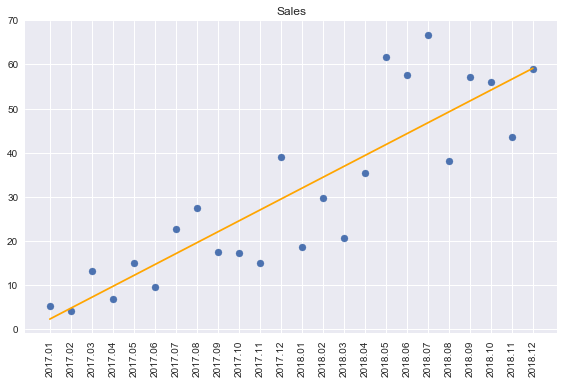

In [10]:


import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import linregress

sales = pd.read_excel('./Sales.xlsx',dtype={'Month':str})
print('----原始数据----')
print(sales.head())
print(sales.columns)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
# linregress 计算两组测量的线性最小二乘回归。
# 共传递两个参数，这连个参数应为连个数组，并且两个素组的值应该一一对应
# 返回值：
# slope：回归线的斜率
# intercept：回归线的截距
# r：相关系数
# p：假设检验的双侧p值，其零假设是斜率为零，使用Wald检验，检验统计量的t分布
# std_err：估计梯度的标准误差。
slope,intercept,r,p,std_err = linregress(sales.index,sales.Revenue)

# 期望值
exp = sales.index * slope + intercept
# 线性回归方程回归方程
# y = slope * x + intercept

plt.scatter(sales.index,sales.Revenue)
plt.plot(sales.index,exp,color='orange')
plt.title('Sales')
plt.xticks(sales.index,sales.Month,rotation=90)
plt.tight_layout()
plt.show()




## 第二十五课 条件格式化（上）


In [9]:
import pandas as pd
import seaborn as sns


def low_score_red(s):
    color = 'red' if s < 60 else 'black'
    return f'color:{color}'


def highest_score_green(col):
    return ['background-color:lime' if s == col.max() else 'background-color:white' for s in col]


students = pd.read_excel('./Students_format.xlsx')
print('----原始数据----')
print(students)
print(students.columns)

students.style.applymap(low_score_red, subset=['Test_1', 'Test_2', 'Test_3']) \
    .apply(highest_score_green, subset=['Test_1', 'Test_2', 'Test_3'])

# 说明
# 由于编辑器的支持问题，此代码的效果可能无法展现
# 请使用 Anaconda 中的 jupyter notebook 中打开 'ConditionalFormatting01.ipynb' 查看运行效果




----原始数据----
    ID         Name  Test_1  Test_2  Test_3
0    1  Student_001      41      31      54
1    2  Student_002      86      22      59
2    3  Student_003      54      25      68
3    4  Student_004      82      36      92
4    5  Student_005      55      99      93
5    6  Student_006      86      12      50
6    7  Student_007      91      11      54
7    8  Student_008      20      98      52
8    9  Student_009      74      85      63
9   10  Student_010      28      98      99
10  11  Student_011      35      83      85
11  12  Student_012      23      48      67
12  13  Student_013      45      62      90
13  14  Student_014      63      26      56
14  15  Student_015      50      64      70
15  16  Student_016      69      31      96
16  17  Student_017      98      78      55
17  18  Student_018      65      74      95
18  19  Student_019      95      51      61
19  20  Student_020      83      72      82
Index(['ID', 'Name', 'Test_1', 'Test_2', 'Test_3'], dtype='obje

,ID,Name,Test_1,Test_2,Test_3
0,1,Student_001,41,31,54
1,2,Student_002,86,22,59
2,3,Student_003,54,25,68
3,4,Student_004,82,36,92
4,5,Student_005,55,99,93
5,6,Student_006,86,12,50
6,7,Student_007,91,11,54
7,8,Student_008,20,98,52
8,9,Student_009,74,85,63
9,10,Student_010,28,98,99



## 第二十六课 条件格式化（下）


In [17]:


import pandas as pd
import seaborn as sns

students = pd.read_excel('./Students_format.xlsx')
print('----原始数据----')
print(students)
print(students.columns)

# 以下两种效果不要同时使用，会被覆盖

# 根据数据的大小显示不同深度的颜色
col_map = sns.light_palette('green', as_cmap=True)
# students.style.background_gradient(col_map, subset=['Test_1', 'Test_2', 'Test_3'])  # 需要引入 seaborn

# 根据数据的大小显示不同长度的色条
students.style.bar(color='orange', subset=['Test_1', 'Test_2', 'Test_3']) # 不需要引入 seaborn

# 说明
# 由于编辑器的支持问题，此代码的效果可能无法展现
# 请使用 Anaconda 中的 jupyter notebook 中打开 'ConditionalFormatting02.ipynb' 查看运行效果


----原始数据----
    ID         Name  Test_1  Test_2  Test_3
0    1  Student_001      41      31      54
1    2  Student_002      86      22      59
2    3  Student_003      54      25      68
3    4  Student_004      82      36      92
4    5  Student_005      55      99      93
5    6  Student_006      86      12      50
6    7  Student_007      91      11      54
7    8  Student_008      20      98      52
8    9  Student_009      74      85      63
9   10  Student_010      28      98      99
10  11  Student_011      35      83      85
11  12  Student_012      23      48      67
12  13  Student_013      45      62      90
13  14  Student_014      63      26      56
14  15  Student_015      50      64      70
15  16  Student_016      69      31      96
16  17  Student_017      98      78      55
17  18  Student_018      65      74      95
18  19  Student_019      95      51      61
19  20  Student_020      83      72      82
Index(['ID', 'Name', 'Test_1', 'Test_2', 'Test_3'], dtype='obje

,ID,Name,Test_1,Test_2,Test_3
0,1,Student_001,41,31,54
1,2,Student_002,86,22,59
2,3,Student_003,54,25,68
3,4,Student_004,82,36,92
4,5,Student_005,55,99,93
5,6,Student_006,86,12,50
6,7,Student_007,91,11,54
7,8,Student_008,20,98,52
8,9,Student_009,74,85,63
9,10,Student_010,28,98,99



## 第二十七课 行操作集锦
### 建议在第八讲之后查看


In [7]:


import pandas as pd 

students_001 = pd.read_excel('./Students_row.xlsx',sheet_name='Page_001',index_col='ID')
students_002 = pd.read_excel('./Students_row.xlsx',sheet_name='Page_002',index_col='ID')
print('----原始数据----')
print('\n----Page_001----')
print(students_001)
print('\n----Page_002----')
print(students_002)

# 追加数据集
students_add_dates = students_001.append(students_002)
print('\n----追加数据集----')
print(students_add_dates)

# 追加数据行
stu_col1 = pd.Series({'Name':'Abel','Score':99})
students_add_col = students_add_dates.append(stu_col1,ignore_index=True)
print('\n----追加数据行----')
print(students_add_col)

# 更改数据
students_001.at[1,'Name'] = 'Jack'
students_001.at[1,'Score'] = 100
print('\n----更改数据 方法一----')
print(students_001)

stu_col2 = pd.Series({'ID':1,"Name":'Chen','Score':110})
students_001.iloc[0] = stu_col2 # iloc 的参数为行数 ，从0开始
print('\n----更改数据 方法二----')
print(students_001)

# 在数据中插入一行
stu_col3 = pd.Series({"Name":'Scort','Score':110})
part1 = students_001[:15]
part2 = students_001[15:]
students_001 = part1.append(stu_col3,ignore_index=True).append(part2,ignore_index=True)
print('\n----在数据中插入一行----')
print(students_001)

# 删除数据行
students_drop_col = students_001.drop(index=range(2,5),inplace=True)
#students_drop_col = students_001.drop(index=students_001[:15],inplace=True)
print('\n----删除数据行----')
print(students_drop_col)

# 带条件的删除
# 设置空值
for i in range(5, 15):
    students_001['Name'].at[i] = ''

# 去掉空值
missing = students_001.loc[students_001['Name'] == '']
students_001.drop(missing.index, inplace=True)
print('\n----带条件的删除----')
print(students_001)

----原始数据----

----Page_001----
           Name  Score
ID                    
1   Student_001     90
2   Student_002     90
3   Student_003     90
4   Student_004     90
5   Student_005     90
6   Student_006     90
7   Student_007     90
8   Student_008     90
9   Student_009     90
10  Student_010     90
11  Student_011     90
12  Student_012     90
13  Student_013     90
14  Student_014     90
15  Student_015     90
16  Student_016     90
17  Student_017     90
18  Student_018     90
19  Student_019     90
20  Student_020     90

----Page_002----
           Name  Score
ID                    
1   Student_001     90
2   Student_002     90
3   Student_003     90
4   Student_004     90
5   Student_005     90
6   Student_006     90
7   Student_007     90
8   Student_008     90
9   Student_009     90
10  Student_010     90
11  Student_011     90
12  Student_012     90
13  Student_013     90
14  Student_014     90
15  Student_015     90
16  Student_016     90
17  Student_017     90
18  Stud

TypeError: drop() got an unexpected keyword argument 'index'


## 第二十八课 列操作集锦
### 建议在第八讲之后查看


In [6]:


import pandas as pd
import numpy as np

students_001 = pd.read_excel('./Students_col.xlsx',sheet_name='Page_001')
students_002 = pd.read_excel('./Students_col.xlsx',sheet_name='Page_002')
print('----原始数据----')
print('\n----Page_001----')
print(students_001)
print('\n----Page_002----')
print(students_002)

# 追加数据集
students_add_dates = pd.concat([students_001,students_002],axis=1)
print('\n----追加数据集(极少使用)----')
print(students_add_dates)

students = pd.concat([students_001,students_002]).reset_index(drop=True)
print('\n----将要使用的数据----')
print(students)

# 追加数据列
# students['Age'] = 25 # 等同于 np.repeat(25,len(students))
students['Age'] = np.arange(0,len(students))
print('\n----追加数据列----')
print(students)

# 删除列
'''
下面报错原因是 pandas 在0.21的版本才加入了columns关键字，在0.20是没有的
pip install --upgrade pandas
'''
students.drop(columns=['Age'],inplace=True)
print('\n----删除列----')
print(students)

# 插入列
students.insert(1,column='Foo',value=np.repeat('foo',len(students)))
print('\n----插入列----')
print(students)

# 修改列名
students.rename(columns={'Foo':'FOO','Name':'NAME'},inplace=True)
print('\n----修改列名----')
print(students)

# 删除含空值的行
# 制造空值
students['ID'] = students['ID'].astype(float)
for i in range(3,5):
    students['ID'].at[i] = np.nan

students.dropna(inplace=True)
print('\n----删除含空值的行----')
print(students)




----原始数据----

----Page_001----
    ID         Name  Score
0    1  Student_001     90
1    2  Student_002     90
2    3  Student_003     90
3    4  Student_004     90
4    5  Student_005     90
5    6  Student_006     90
6    7  Student_007     90
7    8  Student_008     90
8    9  Student_009     90
9   10  Student_010     90
10  11  Student_011     90
11  12  Student_012     90
12  13  Student_013     90
13  14  Student_014     90
14  15  Student_015     90
15  16  Student_016     90
16  17  Student_017     90
17  18  Student_018     90
18  19  Student_019     90
19  20  Student_020     90

----Page_002----
    ID         Name  Score
0    1  Student_001     90
1    2  Student_002     90
2    3  Student_003     90
3    4  Student_004     90
4    5  Student_005     90
5    6  Student_006     90
6    7  Student_007     90
7    8  Student_008     90
8    9  Student_009     90
9   10  Student_010     90
10  11  Student_011     90
11  12  Student_012     90
12  13  Student_013     90
13  14

TypeError: drop() got an unexpected keyword argument 'columns'

In [143]:
print(pd.__version__)


0.20.1



## 第二十九课 读取数据库SQL
### 建议在第八讲之后查看


In [5]:

# # import pyodbc
# # import sqlalchemy
# import pandas as pd
# # sqlalchemy 和 pandas 均可链接数据库，选择其一即可

# # pandas 链接字符串
# connection = pyodbc.connect('DRIVER={SQL Server}; SERVER=(local); DATABASE=AdventureWorks;USER=root;PASSWORD=123456')

# # sqlalchemy 链接字符串
# #engine = sqlalchemy.create_engine('mssql+pyodbc://sa:123456@(local)/AdventureWorks?driver=SQL+Server')

# # 由于数据库中使用单引号，此处使用双引号引用 SQL 语句
# query = "SELECT * FROM data_store.emp"
# df1 = pd.read_sql_query(query, connection)
# df2 = pd.read_sql_query(query, engine)

# pd.options.display.max_columns = 999
# print(df1.head())
# print(df2.head())


In [ ]:
import pymysql  # 导入库

config = {'host': '127.0.0.1',  # 默认127.0.0.1
          'user': 'root',  # 用户名
          'password': '123456',  # 密码
          'port': 3306,  # 端口，默认为3306
          'database': 'data_store',  # 数据库名称
          'charset': 'utf8'  # 字符编码
          }
cnn = pymysql.connect(**config)  # 建立mysql连接
cursor = cnn.cursor()  # 获得游标
sql = "SELECT * FROM `emp`"  # SQL语句
cursor.execute(sql)  # 执行sql语句
data = cursor.fetchall()  # 通过fetchall方法获得数据
for i in data[:2]:  # 打印输出前2条数据
    print(i)
cursor.close()  # 关闭游标
cnn.close()  # 关闭连接


## 第三十课 编写复杂方程
### 建议在第八讲之后查看


In [2]:


import pandas as pd
import numpy as np

# 计算外接圆的面积
def get_Circumscribedcircle_area(lengh,height):
    r = np.sqrt(lengh**2 + height**2) / 2
    return r**2*np.pi

def wrapper(row):
    return get_Circumscribedcircle_area(row['Length'],row['Height'])
    

rectangles = pd.read_excel('./Rectangles.xlsx',index_col='ID')
print('----原始数据----')
print(rectangles)

rectangles['外接圆面积'] = rectangles.apply(lambda row: get_Circumscribedcircle_area(row['Length'],row['Height']),axis=1)
# rectangles['CA'] = rectangles.apply(wrapper,axis=1)
print(rectangles)


----原始数据----
    Length  Height
ID                
1        8       8
2        9       4
3        5       7
4        6       4
5        8       8
6        7       5
7       11       2
8       13       4
9        6       9
10      11       5
11       6       9
12      10       8
13      10       5
14       9       9
15      13       3
16       8       8
17       8       6
18       7       7
19      12       5
20       5       4
    Length  Height       外接圆面积
ID                            
1        8       8  100.530965
2        9       4   76.183622
3        5       7   58.119464
4        6       4   40.840704
5        8       8  100.530965
6        7       5   58.119464
7       11       2   98.174770
8       13       4  145.298660
9        6       9   91.891585
10      11       5  114.668132
11       6       9   91.891585
12      10       8  128.805299
13      10       5   98.174770
14       9       9  127.234502
15      13       3  139.800873
16       8       8  100.530965
17       8 